# Advanced Data Preparation with Python (Car Data)

## Libraries and settings

In [2]:
# Libraries
import os
import re
import time
import fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pytz as tz ### imports timezone library 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print(os.getcwd())

/workspaces/python_data_preparation


## Importing data

In [3]:
# Import data from csv to pandas dataframe named 'df'
df = pd.read_csv('./Data/autoscout24_data.csv', sep=";", encoding='utf-8')

# Change the column names to lowercase
df.columns = df.columns.str.lower()

# Display the first 5 rows of the dataframe
df.head()


,url_short,offer_id,scrape_dt,type,price_raw,hp_raw,init_regist,mileage_raw,fuel_type,transmission,dealer_name,dealer_plz,dealer_city,dealer_street_house_nr,dealer_telnr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
0,https://www.autoscout24.ch/7324420,7324420,2020_03_17 07:34:45,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,***confidential***,8488,Turbenthal,Mettlenstrasse 3,***confidential***,10.2014,10.0,2014.0,2014-10
1,https://www.autoscout24.ch/7512768,7512768,2020_03_17 07:34:55,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,***confidential***,3186,Düdingen,Brugerastrasse 60,***confidential***,6.2013,6.0,2013.0,2013-06
2,https://www.autoscout24.ch/7512034,7512034,2020_03_17 07:35:03,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,***confidential***,1262,Eysins,1262 Eysins,***confidential***,6.2011,6.0,2011.0,2011-06
3,https://www.autoscout24.ch/7512728,7512728,2020_03_17 07:35:06,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,4314,Zeiningen,Am Stutz 21,***confidential***,8.2015,8.0,2015.0,2015-08
4,https://www.autoscout24.ch/7490242,7490242,2020_03_17 07:35:16,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,3250,Lyss,3250 Lyss,***confidential***,9.2018,9.0,2018.0,2018-09


## Count number of rows and columns in the data frame

In [4]:
# Count number of rows and columns in the data frame
df.shape



(3980, 19)

## Get data types (raw-format from web scraper)

In [5]:
# Get data types of each column
df.dtypes

### 'object' types sind kombinierte oder unklare datatypes


url_short                  object
offer_id                    int64
scrape_dt                  object
type                       object
price_raw                  object
hp_raw                     object
init_regist                object
mileage_raw                object
fuel_type                  object
transmission               object
dealer_name                object
dealer_plz                  int64
dealer_city                object
dealer_street_house_nr     object
dealer_telnr               object
init_regist_my             object
init_regist_month         float64
init_regist_year          float64
init_regist_dt             object
dtype: object

## Extract information from raw data using regular expressions (regex)

### Extract numerical values from mileage_raw

In [6]:
# Extract numerical values from mileage_raw
mileage = []
for i in df['mileage_raw']:
    i = i.replace("'","")
    d1 = re.findall('(\d+)\s*km', i)
    try:
        d2 = d1[0].strip().replace("'",'')
    except:
        d2 = None
    mileage.append(d2)


# Save as new variable in the pandas data frame
df['mileage'] = pd.Series(mileage, dtype="Int64")

# Show first records of data frame
df[['mileage_raw', 'mileage']].head()


,mileage_raw,mileage
0,75'000 km,75000
1,46'655 km,46655
2,138'955 km,138955
3,43'000 km,43000
4,43'300 km,43300


### Extract numerical values from hp_raw

In [7]:
# Extract numerical values from hp_raw
horsepower = []
for i in df['hp_raw']:
    d1 = re.findall('(\d+)', i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    horsepower.append(d2)


# Save as new variable in the pandas data frame
df['horsepower'] = pd.Series(horsepower, dtype="Int64")

# Show first records of data frame
df[['hp_raw', 'horsepower']].head()

,hp_raw,horsepower
0,245 PS,245
1,184 PS,184
2,306 PS,306
3,360 PS,360
4,252 PS,252


### Extract numerical values from price_raw

In [8]:
# Extract numerical values from mileage_raw
price = []
for i in df['price_raw']:
    ### replaces the apostrophe (as 1000-separator) with nothing, effectively making regex find all digits as one number
    i = i.replace("'","")
    d1 = re.findall('(\d+)', i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    price.append(d2)

# Save as new variable in the pandas data frame
df['price'] = pd.Series(price, dtype="Int64")

# Show first records of data frame
df[['price_raw', 'price']].head()


,price_raw,price
0,CHF 22'500.–,22500
1,CHF 23'749.–,23749
2,CHF 18'500.–,18500
3,CHF 36'000.–,36000
4,CHF 48'500.–,48500


### Get data types of all variables, including the new once

In [9]:
# Get data types of all variables
df.dtypes

url_short                  object
offer_id                    int64
scrape_dt                  object
type                       object
price_raw                  object
hp_raw                     object
init_regist                object
mileage_raw                object
fuel_type                  object
transmission               object
dealer_name                object
dealer_plz                  int64
dealer_city                object
dealer_street_house_nr     object
dealer_telnr               object
init_regist_my             object
init_regist_month         float64
init_regist_year          float64
init_regist_dt             object
mileage                     Int64
horsepower                  Int64
price                       Int64
dtype: object

## Count and remove missing values

In [10]:
# Count and remove missing values
### this is the number of missing values per column
print(f"Number of missing values: {pd.isna(df).sum()}")
### this summearises the number above
print(f"Number of missing values: {pd.isna(df).sum().sum()}")

df = df.dropna().reset_index(drop=True)

# Reset the index of the dataframe
### this does essentially both steps (dropping NA + resetting Index) in one go
df = df.dropna().reset_index(drop=True)

Number of missing values: url_short                 0
offer_id                  0
scrape_dt                 0
type                      0
price_raw                 0
hp_raw                    0
init_regist               0
mileage_raw               0
fuel_type                 0
transmission              0
dealer_name               0
dealer_plz                0
dealer_city               0
dealer_street_house_nr    2
dealer_telnr              0
init_regist_my            0
init_regist_month         7
init_regist_year          7
init_regist_dt            7
mileage                   0
horsepower                0
price                     0
dtype: int64
Number of missing values: 23


## Count and remove duplicated values

In [11]:
# Count and remove duplicates
### count of cuplicate values on the column 'offer_id'. But it doesnt find anything, is this true? Maybe I check in excel --> >TODO
print(f"Number of duplicated values: {df[df[['offer_id']].duplicated()].sum().sum()}")
print(f"Number of duplicated values: {df.duplicated().sum().sum()}")                                        

# Reset the index of the dataframe
### this does essentially both steps (dropping duplicates + resetting Index) in one go
df = df.drop_duplicates().reset_index(drop=True)


Number of duplicated values: 0.0
Number of duplicated values: 0


## Use string manipulation methods to create additional variables from the car type

### Change strings in 'type' to uppercase

In [12]:
# Change strings in 'type' to uppercase and remove leading and trailing whitespaces
df['type'] = df['type'].str.upper()
df['type'] = df['type'].str.strip()

# Display variable 'type'
df['type'].tail()


3966              FERRARI F360 SPIDER (CABRIOLET)
3967      MERCEDES-BENZ SL 500 560 SL (CABRIOLET)
3968    MERCEDES-BENZ CL 63 AMG 7G-TRONIC (COUPÉ)
3969                  BMW 328I CABRIO (CABRIOLET)
3970            BMW 328I CABRIO SPORT (CABRIOLET)
Name: type, dtype: object

### Calculate length of strings in 'type'

In [13]:
# Calculate length of strings in 'type'
df['type_len'] = df['type'].str.len()


# Display variables 'type' and 'type_len'
df[['type', 'type_len']]


,type,type_len
0,AUDI A5 SPORTBACK 3.0 TDI QUATTRO S-TRONIC (LI...,54
1,MERCEDES-BENZ SLK 200 7G-TRONIC (CABRIOLET),43
2,MERCEDES-BENZ C 350 AVANTGARDE 4MATIC 7G-TRONI...,59
3,MERCEDES-BENZ A 45 AMG 4MATIC SPEEDSHIFT 7G-DC...,59
4,AUDI A5 SPORTBACK 2.0 TFSI SPORT QUATTRO S-TRO...,61
...,...,...
3966,FERRARI F360 SPIDER (CABRIOLET),31
3967,MERCEDES-BENZ SL 500 560 SL (CABRIOLET),39
3968,MERCEDES-BENZ CL 63 AMG 7G-TRONIC (COUPÉ),41
3969,BMW 328I CABRIO (CABRIOLET),27


### Create binary (0/1) variable 'luxury_car'

In [14]:
### not clear if there is supposed to be a text filter involved. 
### as for now, I will simply create the column

### doesnt work:   df['luxury_car'].astype(int)


### Create variable 'price_per_hp'

In [15]:
### includes rounding to the 2nd decimal place
df['price_per_hp'] = round(df['price'] / df['horsepower'],2)

### print the result
### dont forget the double-squared-brackets
df[['type', 'price_per_hp', 'price', 'horsepower']]

,type,price_per_hp,price,horsepower
0,AUDI A5 SPORTBACK 3.0 TDI QUATTRO S-TRONIC (LI...,91.84,22500,245
1,MERCEDES-BENZ SLK 200 7G-TRONIC (CABRIOLET),129.07,23749,184
2,MERCEDES-BENZ C 350 AVANTGARDE 4MATIC 7G-TRONI...,60.46,18500,306
3,MERCEDES-BENZ A 45 AMG 4MATIC SPEEDSHIFT 7G-DC...,100.0,36000,360
4,AUDI A5 SPORTBACK 2.0 TFSI SPORT QUATTRO S-TRO...,192.46,48500,252
...,...,...,...,...
3966,FERRARI F360 SPIDER (CABRIOLET),146.0,58400,400
3967,MERCEDES-BENZ SL 500 560 SL (CABRIOLET),68.53,15900,232
3968,MERCEDES-BENZ CL 63 AMG 7G-TRONIC (COUPÉ),80.0,42000,525
3969,BMW 328I CABRIO (CABRIOLET),51.71,9980,193


### Include current datetime as time stamp

In [16]:
### this is outside the course scope, but I imported another timezone library 
### and in this function I am converting the current time to the timezone of Zurich
zurich_tz = tz.timezone('Europe/Zurich')

### strfrtime is a function to convert a datetime object to a string, then follows the format 
### and the '%' signs are padding operators
### watch how '.now' takes an argument now, which is basically just an offset to UTC
df['datetime'] = datetime.now(zurich_tz).strftime("%Y-%m-%d %H:%M:%S")

df[['type', 'scrape_dt', 'datetime']].head()

,type,scrape_dt,datetime
0,AUDI A5 SPORTBACK 3.0 TDI QUATTRO S-TRONIC (LI...,2020_03_17 07:34:45,2024-11-03 18:19:17
1,MERCEDES-BENZ SLK 200 7G-TRONIC (CABRIOLET),2020_03_17 07:34:55,2024-11-03 18:19:17
2,MERCEDES-BENZ C 350 AVANTGARDE 4MATIC 7G-TRONI...,2020_03_17 07:35:03,2024-11-03 18:19:17
3,MERCEDES-BENZ A 45 AMG 4MATIC SPEEDSHIFT 7G-DC...,2020_03_17 07:35:06,2024-11-03 18:19:17
4,AUDI A5 SPORTBACK 2.0 TFSI SPORT QUATTRO S-TRO...,2020_03_17 07:35:16,2024-11-03 18:19:17


## Discretization of numerical data

In [17]:
### what are the borders and sizes of these bins?


df['price_category'] = pd.cut(df['price'], 
                                bins = 5, 
                                labels = ['very cheap', 
                                            'cheap', 
                                            'normal', 
                                            'expensive', 
                                            'very expensive'])

### What else could I do with these bins?
df['price_category'].unique()

['very cheap', 'cheap', 'very expensive', 'normal', 'expensive']
Categories (5, object): ['very cheap' < 'cheap' < 'normal' < 'expensive' < 'very expensive']

## One Hot Encoding

In [18]:
### One Hot Encoding is a process in the data processing where categorical variables are converted into a form 
### that could be provided to ML algorithms to do a better job in prediction.

try:
    df = pd.get_dummies(df, 
                        columns=['price_category'], 
                        drop_first=False)
except:
    print("Dummy variables already exist")

# Convert boolean values to integers (0 and 1)
### the filter operation selects all the columns containing the string 'price_category'
### the 'df.columns' extracts the column names
### the 'astype' function converts the values (were boolean) to integer
df[df.filter(like='price_category').columns] = df.filter(like='price_category').astype(int)

# Show values of the new dummy variables
df.filter(like='price_category').head()

,price_category_very cheap,price_category_cheap,price_category_normal,price_category_expensive,price_category_very expensive
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


## Scaling

### Min-Max Scaling

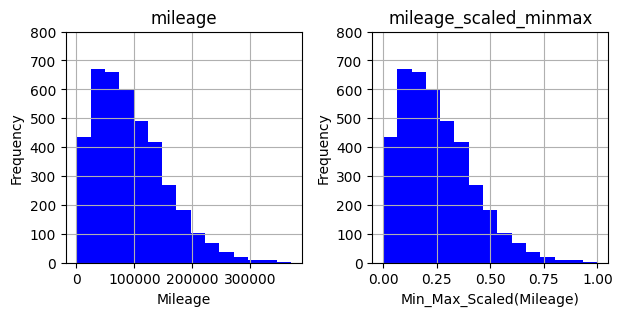

In [ ]:
    ### min-max-scaling scales a value between 0 and 1
# Min-Max scaling of the variable 'mileage'
df['mileage_scaled_minmax'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

# Histogram of the variable 'area' and 'area_scaled'
ax = df[['mileage', 'mileage_scaled_minmax']].hist(bins=15, 
                                      figsize=(7, 3), 
                                      color='blue')
                                      
# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Mileage', 'Min_Max_Scaled(Mileage)']):
    axis.set_ylim(0, 800)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### Max-Absolute Scaling

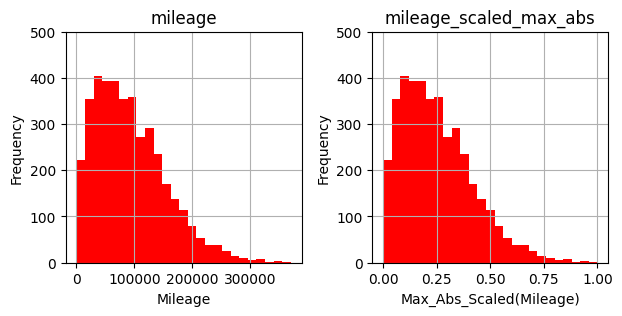

In [23]:
### Min-Abs Scaling scales a value between -1 and 1. It is supposed to deal better with outliers

# Max-Absolute scaling of the variable 'mileage'
df['mileage_scaled_max_abs'] = df['mileage'] / df['mileage'].abs().max()

# Histogram of the variable 'area' and 'area_scaled_max_abs'
ax = df[['mileage', 'mileage_scaled_max_abs']].hist(bins=25, 
                                              figsize=(7, 3), 
                                              color='red')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Mileage', 'Max_Abs_Scaled(Mileage)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### Robust Scaling

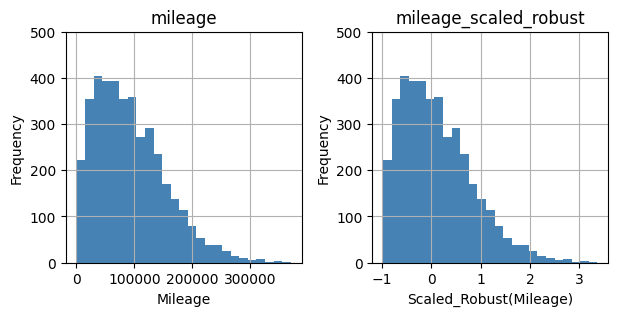

In [ ]:
### Robust oder Huber scaling is another scaling method that is supposed to deal better with outliers than Min-Max scaling

# Robust scaling of the variable 'mileage'
    ### only the calculation is different, the Histogram is the same as in the previous 2 examples
df['mileage_scaled_robust'] = (df['mileage'] - df['mileage'].median()) / \
                           (df['mileage'].quantile(0.75) \
                           - df['mileage'].quantile(0.25))

# Histogram of the variable 'mileage' and 'mileage_scaled_robust'
    ### this creates 2 histograms in one plot
ax = df[['mileage', 'mileage_scaled_robust']].hist(bins=25, 
                                             figsize=(7, 3), 
                                             color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Mileage', 'Scaled_Robust(Mileage)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

## Standardization

### Z-score Normalization

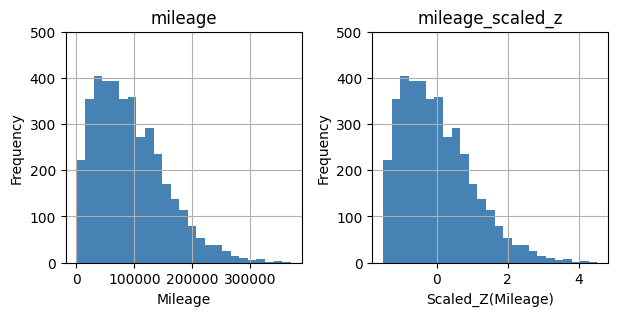

In [26]:
# Z-score Normalization of the variable 'mileage'
df['mileage_scaled_z'] = (df['mileage'] - df['mileage'].mean()) / df['mileage'].std()


# Histogram of the variable 'mileage' and 'mileage_scaled_robust'
ax = df[['mileage', 'mileage_scaled_z']].hist(bins=25, 
                                             figsize=(7, 3), 
                                             color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Mileage', 'Scaled_Z(Mileage)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

## Transformation

### Log-Transformation

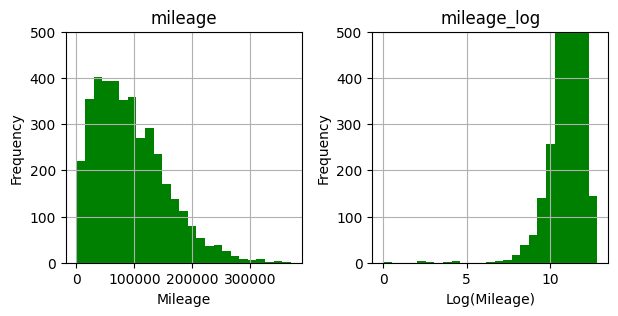

In [27]:
# Log-Transformation of the variable 'mileage'
df['mileage_log'] = np.log(df['mileage'])

# Histogram of the variable 'mileage' and 'mileage_log'
ax = df[['mileage', 'mileage_log']].hist(bins=25, 
                                             figsize=(7, 3), 
                                             color='green')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Mileage', 'Log(Mileage)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### SQRT-Transformation

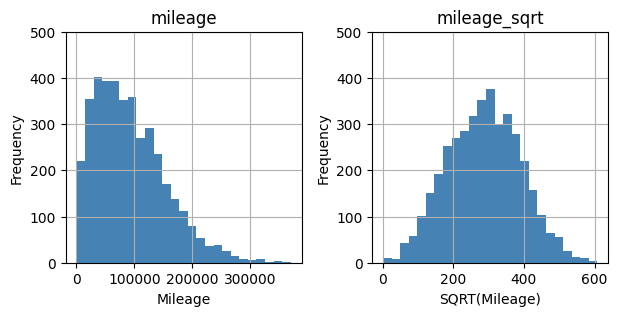

In [ ]:
# SQRT-Transformation of the variable 'mileage'.    ### SQRT stands for square root ###
df['mileage_sqrt'] = np.sqrt(df['mileage'])

# Histogram of the variable 'area' and 'area_sqrt'
ax = df[['mileage', 'mileage_sqrt']].hist(bins=25, 
                                    figsize=(7, 3), 
                                    color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Mileage', 'SQRT(Mileage)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### Box-Cox Transformation

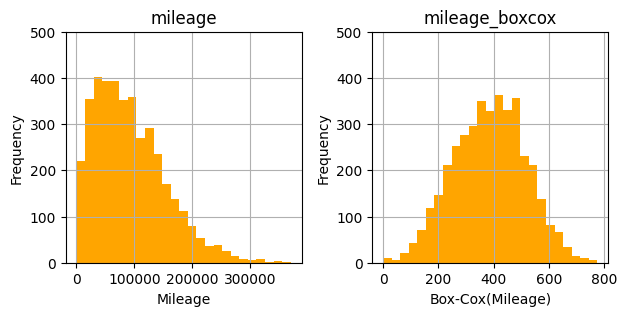

In [ ]:
### as per Wiki, the Boxcox transformation is more generalisational and can also deal with non-positive values

# Box-Cox Transformation of the variable 'mileage'
from scipy.stats import boxcox

# Apply Box-Cox transformation
df['mileage_boxcox'], _ = boxcox(df['mileage'])

# Histogram of the variable 'area' and 'area_boxcox'
ax = df[['mileage', 'mileage_boxcox']].hist(bins=25, 
                                      figsize=(7, 3), 
                                      color='orange')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Mileage', 'Box-Cox(Mileage)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

## Combining & organizing data

### Reading car data with geocoded addresses

In [30]:
# Meaning of variables
# lat: geographical latitude
# lon: geographical longitude
# bfs_number: official municipality id
# bfs_name: official municipality name

# Geocoded data (i.e. data with latitude and longitude)
df_geo = pd.read_csv('./Data/autoscout24_data_geocoded.csv', 
                     sep=';', 
                     encoding='utf-8')

# Show data
df_geo.head()

,offer_id,lat,lon,bfs_number,bfs_name
0,7324420,47.434376,8.859333,228,Turbenthal
1,7512768,46.850327,7.200491,2293,Düdingen
2,7512034,46.386593,6.204862,5716,Eysins
3,7512728,47.542408,7.873130,4263,Zeiningen
4,7490242,47.067474,7.302120,306,Lyss


### Join geo-information to car data using .merge()

In [ ]:
    ### this operation merges df_geo to df, based on the column 'web-scraper-order'. It's sort of like a SQL Join on    

df2 = df.merge(df_geo[['offer_id', 
                       'lat', 
                       'lon', 
                       'bfs_number', 
                       'bfs_name']], 
               on="offer_id")

# Show data
df2[['offer_id',
     'type',
     'price',
     'mileage',
     'horsepower',
     'dealer_name',
     'lat', 
     'lon', 
     'bfs_number', 
     'bfs_name']].head()

### for some reason, the 'dealer_name' defaults to being confidential.

,offer_id,type,price,mileage,horsepower,dealer_name,lat,lon,bfs_number,bfs_name
0,7324420,AUDI A5 SPORTBACK 3.0 TDI QUATTRO S-TRONIC (LI...,22500,75000,245,***confidential***,47.434376,8.859333,228,Turbenthal
1,7512768,MERCEDES-BENZ SLK 200 7G-TRONIC (CABRIOLET),23749,46655,184,***confidential***,46.850327,7.200491,2293,Düdingen
2,7512034,MERCEDES-BENZ C 350 AVANTGARDE 4MATIC 7G-TRONI...,18500,138955,306,***confidential***,46.386593,6.204862,5716,Eysins
3,7512728,MERCEDES-BENZ A 45 AMG 4MATIC SPEEDSHIFT 7G-DC...,36000,43000,360,***confidential***,47.542408,7.873130,4263,Zeiningen
4,7490242,AUDI A5 SPORTBACK 2.0 TFSI SPORT QUATTRO S-TRO...,48500,43300,252,***confidential***,47.067474,7.302120,306,Lyss


### Reading municipality-level data from an .xlsx - file

In [32]:
# Meaning of variables:
# bfs_number: municipality id
# bfs_name: municipality name
# pop: number of residents
# pop_dens: population density per km2
# frg_pct: percentage foreigners
# emp: number of employees

df_municip = pd.read_excel('./Data/municipality_data.xlsx', 
                           sheet_name='data_for_import')
df_municip.head(5)

,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp
0,1,Aeugst am Albis,1981,250.442478,14.184755,442.0
1,2,Affoltern am Albis,12303,1161.756374,28.700317,6920.0
2,3,Bonstetten,5572,749.932705,16.564968,1014.0
3,4,Hausen am Albis,3751,275.808824,16.022394,1021.0
4,5,Hedingen,3778,578.560490,16.410799,1478.0


### Join municipality-level data to the car data data using .merge()

In [33]:
### another JOIN operation

df3 = df2.merge(df_municip[['bfs_number', 
                            'pop', 
                            'pop_dens', 
                            'frg_pct', 
                            'emp']], 
                on="bfs_number")

df3.head()

,url_short,offer_id,scrape_dt,type,price_raw,hp_raw,init_regist,mileage_raw,fuel_type,transmission,...,mileage_sqrt,mileage_boxcox,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp
0,https://www.autoscout24.ch/7324420,7324420,2020_03_17 07:34:45,AUDI A5 SPORTBACK 3.0 TDI QUATTRO S-TRONIC (LI...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,...,273.861279,371.799354,47.434376,8.859333,228,Turbenthal,4883,193.616178,20.540651,1631.0
1,https://www.autoscout24.ch/7512768,7512768,2020_03_17 07:34:55,MERCEDES-BENZ SLK 200 7G-TRONIC (CABRIOLET),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,...,215.997685,298.687360,46.850327,7.200491,2293,Düdingen,8181,265.962289,14.228089,3982.0
2,https://www.autoscout24.ch/7512034,7512034,2020_03_17 07:35:03,MERCEDES-BENZ C 350 AVANTGARDE 4MATIC 7G-TRONI...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,...,372.766683,493.921497,46.386593,6.204862,5716,Eysins,1735,728.991597,32.737752,1622.0
3,https://www.autoscout24.ch/7512728,7512728,2020_03_17 07:35:06,MERCEDES-BENZ A 45 AMG 4MATIC SPEEDSHIFT 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,...,207.364414,287.647553,47.542408,7.873130,4263,Zeiningen,2381,209.410730,16.757665,571.0
4,https://www.autoscout24.ch/7490242,7490242,2020_03_17 07:35:16,AUDI A5 SPORTBACK 2.0 TFSI SPORT QUATTRO S-TRO...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,...,208.08652,288.572398,47.067474,7.302120,306,Lyss,15525,1046.864464,18.962963,8495.0


### Sorting data

In [35]:
df3 = df3.sort_values(by=['price', 'horsepower'], 
                ascending=False)


df3[['offer_id', 'type', 'price', 'horsepower', 'mileage', 'dealer_name', 'pop', 'pop_dens', 'bfs_name']].head()

,offer_id,type,price,horsepower,mileage,dealer_name,pop,pop_dens,bfs_name
1434,6395032,PORSCHE 911 GT2 RS (COUPÉ),428000,620,8900,***confidential***,2435,233.014354,Vuadens
274,6978696,LAMBORGHINI AVENTADOR S LP740-4 ROADSTER E-GEA...,384900,741,4000,***confidential***,420217,4778.994655,Zürich
2400,7448261,PORSCHE 911 SPEEDSTER MANUAL GEARBOX CHALK WHI...,379000,510,14,***confidential***,139408,3368.970517,Lausanne
3424,6768872,MCLAREN 675LT COUPÉ 3.8 V8 SSG (COUPÉ),280000,675,11500,***confidential***,203951,12810.992462,Genève
1612,5887777,MERCEDES-BENZ 220 SE (CABRIOLET),255000,120,1200,***confidential***,5776,403.916084,Hergiswil (NW)


### Reshaping data

#### Reshaping data using .stack() and .unstack()

In [ ]:
### stacking is a type of data transformation and converts the data from a wide to a long format

df_sub = df3[['type', 'price', 'horsepower', 'bfs_name']][:5]
print('Original shape')
print(df_sub, '\n')

df_sub_stacked = df_sub.stack()
print('Stacked')
print(df_sub_stacked, '\n')

# Using unstack
print('Unstacked (= back to original shape)')
print(df_sub_stacked.unstack())

Original shape
                                                   type   price  horsepower  \
1434                         PORSCHE 911 GT2 RS (COUPÉ)  428000         620   
274   LAMBORGHINI AVENTADOR S LP740-4 ROADSTER E-GEA...  384900         741   
2400  PORSCHE 911 SPEEDSTER MANUAL GEARBOX CHALK WHI...  379000         510   
3424             MCLAREN 675LT COUPÉ 3.8 V8 SSG (COUPÉ)  280000         675   
1612                   MERCEDES-BENZ 220 SE (CABRIOLET)  255000         120   

            bfs_name  
1434         Vuadens  
274           Zürich  
2400        Lausanne  
3424          Genève  
1612  Hergiswil (NW)   

Stacked
1434  type                                 PORSCHE 911 GT2 RS (COUPÉ)
      price                                                    428000
      horsepower                                                  620
      bfs_name                                                Vuadens
274   type          LAMBORGHINI AVENTADOR S LP740-4 ROADSTER E-GEA...
      price 

#### Reshaping data using .melt()

In [ ]:
### melting is also some type of data transformation, but it converts the data from a wide to a long format. 

df_sub = df3[['type', 'price', 'horsepower']][:5]
print('Original shape')
print(df_sub, '\n')

print('Reshaped using .melt()')
print(pd.melt(df, id_vars=['type'], value_vars=['price', 'horsepower']))

Original shape
                                                   type   price  horsepower
1434                         PORSCHE 911 GT2 RS (COUPÉ)  428000         620
274   LAMBORGHINI AVENTADOR S LP740-4 ROADSTER E-GEA...  384900         741
2400  PORSCHE 911 SPEEDSTER MANUAL GEARBOX CHALK WHI...  379000         510
3424             MCLAREN 675LT COUPÉ 3.8 V8 SSG (COUPÉ)  280000         675
1612                   MERCEDES-BENZ 220 SE (CABRIOLET)  255000         120 

Reshaped using .melt()
                                                   type    variable  value
0     AUDI A5 SPORTBACK 3.0 TDI QUATTRO S-TRONIC (LI...       price  22500
1           MERCEDES-BENZ SLK 200 7G-TRONIC (CABRIOLET)       price  23749
2     MERCEDES-BENZ C 350 AVANTGARDE 4MATIC 7G-TRONI...       price  18500
3     MERCEDES-BENZ A 45 AMG 4MATIC SPEEDSHIFT 7G-DC...       price  36000
4     AUDI A5 SPORTBACK 2.0 TFSI SPORT QUATTRO S-TRO...       price  48500
...                                                 ..

### Pivoting data using .pivot_table()

In [ ]:
pivot_table = pd.pivot_table(df3[['price', 'horsepower', 'mileage', 'bfs_name', 'type']],
                             index=['bfs_name'],
                             values={'price': np.mean, 
                                     'mileage': np.mean, 
                                     'horsepower': np.mean}).round(2)
### I wanted to insert a the count of types or offer_id, but I am not sure how to do that

# Format the values to 2 decimal places with trailing zeros
        ### REVISE this 
pivot_table = pivot_table.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

# Display the pivot table
pivot_table.sort_values(by='price', ascending=False)

### the sorting is working very weird. REVISE this.

,horsepower,mileage,price
bfs_name,,,
Entlebuch,163.00,107000.00,9999.00
Ried bei Kerzers,460.00,20089.00,99900.00
Hauterive (NE),360.00,5000.00,99000.00
Dänikon,85.00,144000.00,9850.00
Zell (LU),290.00,245000.00,9800.00
...,...,...,...
Hallau,136.33,148285.00,10100.00
Langenthal,139.80,111300.00,10020.00
Savosa,143.00,41324.00,10000.00


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [44]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-03 18:25:45
Python Version: 3.11.10
-----------------------------------
